<a href="https://colab.research.google.com/github/ananthuac/ananthuac/blob/main/Data%20Manipulation%20and%20feature%20engineering%20on%20the%20Loan%20Prediction%20Datase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To upload `loan_train.csv (1).csv`, run the following cell. A file selection dialog will appear, allowing you to choose the file from your local computer. Once uploaded, the file will be accessible in your Colab environment.

In [32]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving loan_train.csv.csv to loan_train.csv (3).csv
User uploaded file "loan_train.csv (3).csv" with length 38011 bytes


In [33]:
#Part 1 – Import Libraries & Load Dataset
import pandas as pd          # Pandas is used for data loading and data manipulation
import numpy as np           # NumPy is used for numerical computations
import matplotlib.pyplot as plt   # Matplotlib is used for plotting graphs
import seaborn as sns        # Seaborn is used for advanced statistical visualizations
sns.set(style="whitegrid")   # Sets a clean white grid style for all plots
loan = pd.read_csv("loan_train.csv (1).csv")
# Reads the Loan Prediction CSV file and stores it into a DataFrame called 'loan'
print(loan.head())  # Displays the first 5 rows of the dataset to understand its structure
print(loan.isnull().sum())  # Displays the total number of missing values in each column


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [34]:
# PART 2 – Drop Loan_ID
loan.drop('Loan_ID', axis=1, inplace=True)
# Removes the 'Loan_ID' column from the dataset.
# axis=1 indicates column deletion.
# inplace=True means the column is removed permanently from the original dataframe.
loan.head()
# Displays the first 5 rows after removing the Loan_ID column
# to confirm that it has been successfully dropped.



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
# PART 3 – Handle Missing Values
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode()[0])
# Replaces missing values in the 'Gender' column with the most frequent value (mode).
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
# Fills missing values in the 'Married' column with the most common category.
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mode()[0])
# Replaces missing values in the 'Dependents' column with its most frequent value.
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
# Fills missing values in the 'Self_Employed' column with the most common employment status.
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].median())
# Replaces missing values in 'LoanAmount' with the median to avoid the effect of outliers.
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median())
# Fills missing values in loan duration using the median value.
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])
# Replaces missing values in credit history with the most frequent value.



In [27]:
# PART 4 – Feature Engineering
loan['TotalIncome'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']
# Creates a new feature 'TotalIncome' by adding applicant and coapplicant incomes.
loan['IncomeLog'] = np.log(loan['TotalIncome'] + 1)
# Applies logarithmic transformation to 'TotalIncome' to reduce skewness.
loan['LoanAmountLog'] = np.log(loan['LoanAmount'] + 1)
# Applies logarithmic transformation to 'LoanAmount' to stabilize variance.
loan[['TotalIncome','IncomeLog','LoanAmountLog']].head()
# Displays first five rows of the newly created features.


,TotalIncome,IncomeLog,LoanAmountLog
0,5849.0,8.674197,4.859812
1,6091.0,8.714732,4.859812
2,3000.0,8.006701,4.204693
3,4941.0,8.505525,4.795791
4,6000.0,8.699681,4.955827


In [28]:
# PART 5 – Encode Categorical Data
loan['Gender'] = loan['Gender'].map({'Male':0,'Female':1})
# Converts Gender column into numerical form: Male → 0, Female → 1.
loan['Married'] = loan['Married'].map({'No':0,'Yes':1})
# Converts Married status into numbers: No → 0, Yes → 1.
loan['Education'] = loan['Education'].map({'Not Graduate':0,'Graduate':1})
# Encodes education level: Not Graduate → 0, Graduate → 1.
loan['Self_Employed'] = loan['Self_Employed'].map({'No':0,'Yes':1})
# Encodes employment status: No → 0, Yes → 1.
loan['Loan_Status'] = loan['Loan_Status'].map({'N':0,'Y':1})
# Converts loan approval status into binary format: N → 0, Y → 1
loan = pd.get_dummies(loan, columns=['Dependents','Property_Area'], drop_first=True)
# Applies one-hot encoding to multi-class columns Dependents and Property_Area.
# drop_first=True avoids dummy variable trap by dropping the first category.
loan.head()
# Displays the first five rows after encoding categorical features.



,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,IncomeLog,LoanAmountLog,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,5849.0,8.674197,4.859812,False,False,False,False,True
1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,8.714732,4.859812,True,False,False,False,False
2,0,1,1,1,3000,0.0,66.0,360.0,1.0,1,3000.0,8.006701,4.204693,False,False,False,False,True
3,0,1,0,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,8.505525,4.795791,False,False,False,False,True
4,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,6000.0,8.699681,4.955827,False,False,False,False,True


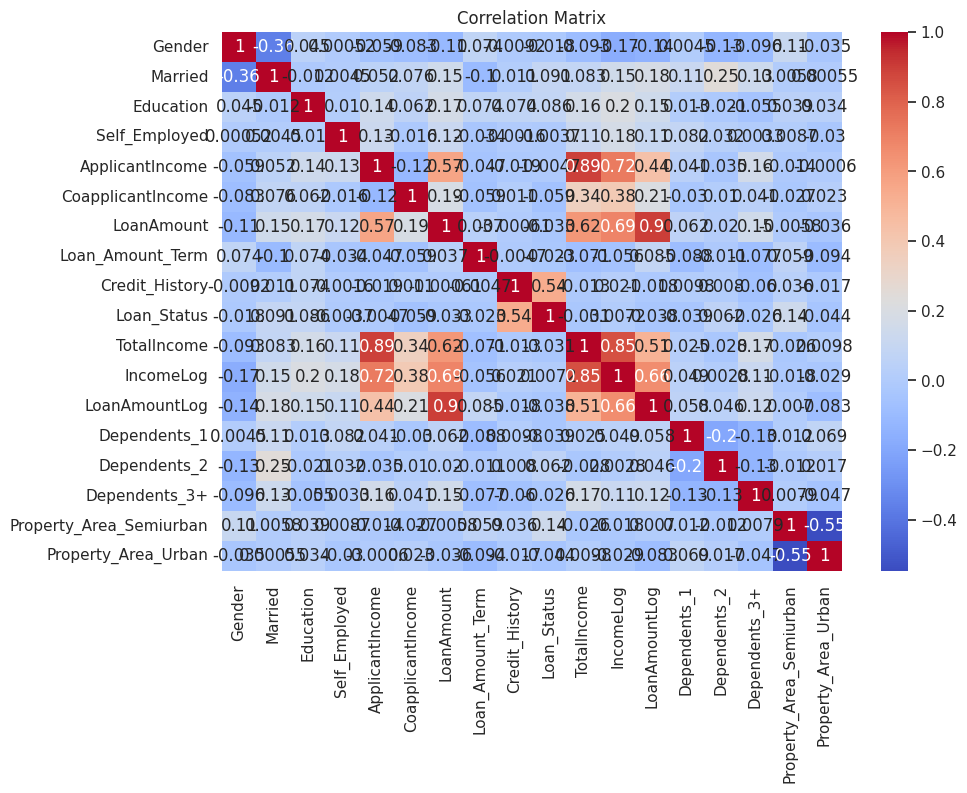

In [29]:
# PART 6 – Correlation Heatmap
plt.figure(figsize=(10,7))
# Creates a new figure with width 10 and height 7 inches.
sns.heatmap(loan.corr(), annot=True, cmap='coolwarm')
# Generates a heatmap showing correlation values between numerical features.
# annot=True displays the correlation values inside the cells.
# cmap='coolwarm' applies a red-blue color gradient.
plt.title("Correlation Matrix")
# Sets the title of the heatmap.
plt.show()
# Displays the heatmap.


In [30]:
# PART 7 – Feature Selection
features = ['Gender','Married','Education','Self_Employed','LoanAmountLog','IncomeLog','Credit_History','Property_Area_Semiurban','Property_Area_Urban']
# Creates a list of selected important features for building the model.
X = loan[features]
# Extracts the selected feature columns and stores them in X (independent variables).
y = loan['Loan_Status']
# Stores the target variable Loan_Status in y (dependent variable).
print(X.head())
# Displays the first five rows of the feature matrix.
print(y.head())
# Displays the first five values of the target variable.










   Gender  Married  Education  Self_Employed  LoanAmountLog  IncomeLog  \
0       0        0          1              0       4.859812   8.674197   
1       0        1          1              0       4.859812   8.714732   
2       0        1          1              1       4.204693   8.006701   
3       0        1          0              0       4.795791   8.505525   
4       0        0          1              0       4.955827   8.699681   

   Credit_History  Property_Area_Semiurban  Property_Area_Urban  
0             1.0                    False                 True  
1             1.0                    False                False  
2             1.0                    False                 True  
3             1.0                    False                 True  
4             1.0                    False                 True  
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64
